# Chapter10 - Timeseries Forecasting: DataPrep

In [130]:
import pandas as pd
import numpy as np
from datetime import timedelta

In [131]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
df = pd.read_csv(url)

In [132]:
df["Date"] = pd.to_datetime(df["Date"]) + timedelta(days=365*30)

In [133]:
def range_inc(start, stop, step, inc):
    i = start
    while i < stop:
        yield i
        i += step
        step += inc

In [135]:
len(df)

3650

In [136]:
x = list(range_inc(0.1, 100, 0.00199, 0.00001))
print(len(x))

4276


In [137]:
x = x[:len(df)]

In [139]:
# df["Temp2"] = df.Temp.astype('category').cat.codes.add(25)
# df["Temp2"] = df.Temp.ne(df.Temp.shift()).cumsum()
df["Temp2"] = df["Temp"] * x

In [140]:
df.head()

,Date,Temp,Temp2
0,2010-12-25,20.7,2.070000
1,2010-12-26,17.9,1.825621
2,2010-12-27,18.8,1.955012
3,2010-12-28,14.6,1.547600
4,2010-12-29,15.8,1.706716


In [141]:
df.tail()

,Date,Temp,Temp2
3645,2020-12-19,14.0,1032.716300
3646,2020-12-20,13.6,1003.732904
3647,2020-12-21,13.5,996.871590
3648,2020-12-22,15.7,1159.928560
3649,2020-12-23,13.0,960.950510


In [142]:
import matplotlib.pyplot as plt

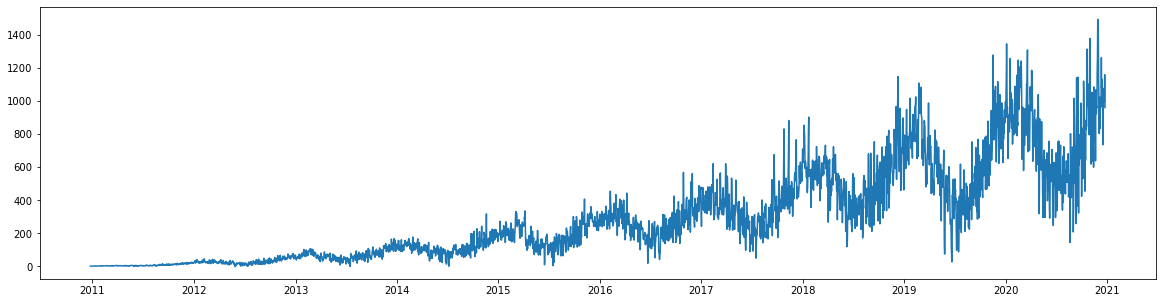

In [143]:
plt.figure(figsize=(20,5))
plt.plot(df.Date, df.Temp2)

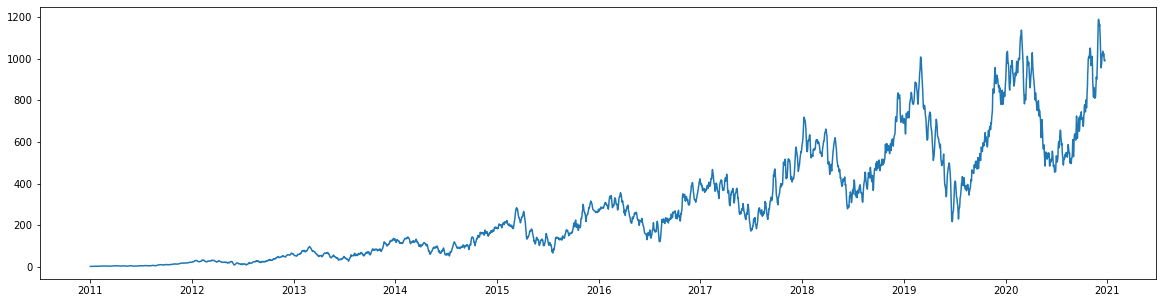

In [149]:
df['Temp3'] = df["Temp2"].rolling(window=10).mean()
plt.figure(figsize=(20,5))
plt.plot(df.Date, df.Temp3)

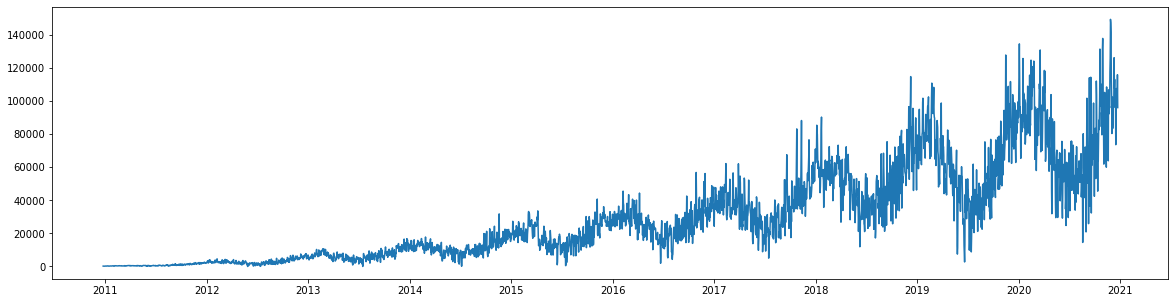

In [160]:
df['Temp4'] = df["Temp2"] * 100
plt.figure(figsize=(20,5))
plt.plot(df.Date, df.Temp4)

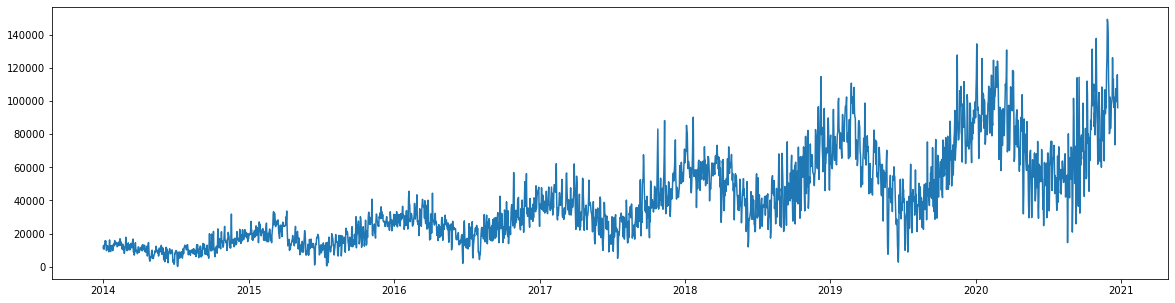

In [218]:
df2 = df.iloc[1103:]
df["Temp4"] = round(df["Temp4"])
plt.figure(figsize=(20,5))
plt.plot(df2.Date, df2.Temp4)

In [219]:
df2.head()

,Date,Temp,Temp2,Temp3,Temp4
1103,2014-01-01,13.4,112.191500,127.559277,11219
1104,2014-01-02,15.2,127.459904,125.444882,12745
1105,2014-01-03,12.5,104.981875,119.819104,10498
1106,2014-01-04,14.3,120.285737,117.686073,12028
1107,2014-01-05,16.5,139.006560,117.402980,13900


In [220]:
df2.tail()

,Date,Temp,Temp2,Temp3,Temp4
3645,2020-12-19,14.0,1032.716300,1022.840540,103271
3646,2020-12-20,13.6,1003.732904,996.931533,100373
3647,2020-12-21,13.5,996.871590,988.635006,99687
3648,2020-12-22,15.7,1159.928560,991.443021,115992
3649,2020-12-23,13.0,960.950510,991.207196,96095


In [221]:
df2 = df2[["Date", "Temp4"]]
df2.columns = ["Date", "Sales"]

In [222]:
df2 = df2.reset_index(drop=True)

In [223]:
df2.head()

,Date,Sales
0,2014-01-01,11219
1,2014-01-02,12745
2,2014-01-03,10498
3,2014-01-04,12028
4,2014-01-05,13900


In [224]:
df2.tail()

,Date,Sales
2542,2020-12-19,103271
2543,2020-12-20,100373
2544,2020-12-21,99687
2545,2020-12-22,115992
2546,2020-12-23,96095


In [225]:
df2.to_csv("dataset_demand_forecasting_sd.csv", index=False)